## Downloads & imports

In [ ]:
!pip install whisper-timestamped noisereduce

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.9/52.9 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 745.0/745.0 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 798.6/798.6 kB 30.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 67.1 MB/s eta 0:00:00
  Created wheel for openai-whisper: filename=openai_whisper-20231117-py3-none-any.whl size=801356 sha256=5b44978c62b7a1af2fdfd1232975f1928aeeebd3cb60247c53b8c0ffae4d6dbd
  Stored in directory: /root/.cache/pip/wheels/d0/85/e1/9361b4cbea7dd4b7f6702fa4c3afc94877952eeb2b62f45f56
Successfully built openai-whisper


In [ ]:
import noisereduce as nr
import soundfile as sf
import io
import librosa
import IPython
import whisper_timestamped

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



## Preliminary work

In [ ]:
model = whisper_timestamped.load_model("medium")

In [ ]:
audio = whisper_timestamped.load_audio("1.wav")
result = whisper_timestamped.transcribe(model, audio, language="ru", detect_disfluencies=True, remove_punctuation_from_words=False)

100%|██████████| 2333/2333 [01:06<00:00, 35.25frames/s]


In [ ]:
IPython.display.Audio(data=audio, rate=16000)

In [ ]:
long_audio = whisper_timestamped.load_audio("long_rus.wav")
long_result = whisper_timestamped.transcribe(model, long_audio, language="ru", detect_disfluencies=True, remove_punctuation_from_words=False)

100%|██████████| 58976/58976 [24:49<00:00, 39.61frames/s]


In [ ]:
result

{'text': ' Так, я записываю на диктофоне какое-то голосовое, чтобы потом его отправить на тест. В принципе всё, будем сейчас тестировать. Думаю секунд 20 хватит, да на остальном в принципе можно и закончить. Сейчас только дождусь, 18, 19, 20. Всё, пауза для... готова.',
 'segments': [{'id': 0,
   'seek': 0,
   'start': 0.72,
   'end': 6.66,
   'text': ' Так, я записываю на диктофоне какое-то голосовое, чтобы потом его отправить на тест.',
   'tokens': [50364,
    8770,
    11,
    2552,
    36426,
    4655,
    3776,
    1470,
    1070,
    3605,
    860,
    3619,
    25561,
    37932,
    12,
    860,
    42390,
    1055,
    5805,
    11,
    7887,
    16873,
    6448,
    38427,
    3258,
    1470,
    41699,
    13,
    50714],
   'temperature': 0.0,
   'avg_logprob': -0.22900824711240572,
   'compression_ratio': 1.75390625,
   'no_speech_prob': 0.0015226379036903381,
   'confidence': 0.925,
   'words': [{'text': 'Так,', 'start': 0.72, 'end': 1.14, 'confidence': 0.618},
    {'text

In [ ]:
result["segments"][0]["words"]

[{'text': 'Так,', 'start': 0.72, 'end': 1.14, 'confidence': 0.618},
 {'text': 'я', 'start': 1.5, 'end': 1.66, 'confidence': 0.95},
 {'text': 'записываю', 'start': 1.66, 'end': 2.2, 'confidence': 0.992},
 {'text': 'на', 'start': 2.2, 'end': 2.3, 'confidence': 0.994},
 {'text': 'диктофоне', 'start': 2.3, 'end': 2.98, 'confidence': 0.987},
 {'text': 'какое-то', 'start': 2.98, 'end': 3.5, 'confidence': 0.943},
 {'text': 'голосовое,', 'start': 3.5, 'end': 4.4, 'confidence': 0.995},
 {'text': 'чтобы', 'start': 4.7, 'end': 4.84, 'confidence': 0.815},
 {'text': 'потом', 'start': 4.84, 'end': 5.2, 'confidence': 0.798},
 {'text': 'его', 'start': 5.2, 'end': 5.44, 'confidence': 0.754},
 {'text': 'отправить', 'start': 5.44, 'end': 5.94, 'confidence': 0.976},
 {'text': 'на', 'start': 5.94, 'end': 6.22, 'confidence': 0.933},
 {'text': '[*]', 'start': 6.22, 'end': 6.48, 'confidence': 0.0},
 {'text': 'тест.', 'start': 6.48, 'end': 6.66, 'confidence': 0.81}]

In [ ]:
def get_words(transcription):
    all_words, all_words_without_disfluencies, disfluencies = [], [], []
    for sentence in transcription["segments"]:
            for word in sentence["words"]:
                  all_words.append(word)
                  if word["text"] != "[*]":
                      all_words_without_disfluencies.append(word)
                  else:
                      disfluencies.append((word["start"], word["end"]))
    return all_words, all_words_without_disfluencies, disfluencies

In [ ]:
all_words_from_short, all_words_without_disfl_from_short, disfluencies_from_short = get_words(result)
assert len(all_words_without_disfl_from_short) == len(result["text"].split())
all_words_from_short[:10]

[{'text': 'Так,', 'start': 0.72, 'end': 1.14, 'confidence': 0.617},
 {'text': 'я', 'start': 1.5, 'end': 1.66, 'confidence': 0.95},
 {'text': 'записываю', 'start': 1.66, 'end': 2.2, 'confidence': 0.992},
 {'text': 'на', 'start': 2.2, 'end': 2.3, 'confidence': 0.995},
 {'text': 'диктофоне', 'start': 2.3, 'end': 2.98, 'confidence': 0.987},
 {'text': 'какое-то', 'start': 2.98, 'end': 3.5, 'confidence': 0.943},
 {'text': 'голосовое,', 'start': 3.5, 'end': 4.4, 'confidence': 0.995},
 {'text': 'чтобы', 'start': 4.7, 'end': 4.84, 'confidence': 0.816},
 {'text': 'потом', 'start': 4.84, 'end': 5.2, 'confidence': 0.799},
 {'text': 'его', 'start': 5.2, 'end': 5.44, 'confidence': 0.754}]

In [ ]:
all_words_from_long, all_words_without_disfl_from_long, disfluencies_from_long = get_words(long_result)
assert len(all_words_without_disfl_from_long) == len(long_result["text"].split())
all_words_from_long[:10]

[{'text': '[*]', 'start': 2.42, 'end': 2.44, 'confidence': 0.0},
 {'text': 'Значит', 'start': 2.44, 'end': 2.9, 'confidence': 0.37},
 {'text': '[*]', 'start': 2.9, 'end': 4.26, 'confidence': 0.0},
 {'text': 'попытка', 'start': 4.26, 'end': 4.58, 'confidence': 0.677},
 {'text': 'номер', 'start': 4.58, 'end': 4.9, 'confidence': 0.969},
 {'text': '20', 'start': 4.9, 'end': 5.1, 'confidence': 0.659},
 {'text': 'писать', 'start': 5.1, 'end': 5.54, 'confidence': 0.693},
 {'text': 'нормальное', 'start': 5.54, 'end': 6.08, 'confidence': 0.847},
 {'text': 'аудио', 'start': 6.08, 'end': 6.66, 'confidence': 0.975},
 {'text': 'для', 'start': 6.66, 'end': 7.5, 'confidence': 0.914}]

## Silence & Speech Rate

### Silence periods

In [ ]:
rules = {"word": 0.5, "punct_mark": 0.75, ".": 1, "?": 5, "!": 3}

In [ ]:
def find_pauses(rules, all_words):
    pauses = []
    start_idx = 0
    end_idx = 1
    while end_idx < len(all_words) - 1:
        if all_words[end_idx]["text"] == "[*]":
            end_idx += 1
            continue
        silence_start = all_words[start_idx]["end"]
        silence_end = all_words[end_idx]["start"]
        if all_words[start_idx]["text"][-1].isalpha():
            pause_type = rules["word"]
        elif all_words[start_idx]["text"][-1] in rules:
            pause_type = rules[all_words[start_idx]["text"][-1]]
        else:
            pause_type = rules["punct_mark"]
        if silence_end - silence_start > pause_type:
            # pauses.append((all_words[start_idx]["text"], silence_start, silence_end))
            pauses.append((silence_start, silence_end))
        start_idx = end_idx
        end_idx += 1
    return pauses

#### Short audio

In [ ]:
pauses = find_pauses(rules, all_words_from_short)
pauses

[('тест.', 6.66, 8.08),
 ('всё,', 9.46, 10.38),
 ('секунд', 12.58, 12.94),
 ('хватит,', 14.12, 15.28)]

#### Long audio

In [ ]:
pauses = find_pauses(rules, all_words_from_long)
print(len(pauses))
pauses[:10]

110


[(2.9, 4.26),
 (10.48, 12.28),
 (15.2, 16.0),
 (16.92, 17.6),
 (19.36, 21.26),
 (21.46, 22.22),
 (22.24, 22.84),
 (27.1, 29.34),
 (37.04, 39.7),
 (58.42, 59.42)]

### Rate of speech

In [ ]:
all_words_without_disfl_from_long[-1]["end"] / 60 # speech length in minutes

9.804666666666666

In [ ]:
len(all_words_without_disfl_from_long) / (all_words_without_disfl_from_long[-1]["end"] / 60) # average speech rate (quite low in this sample)

66.90691507445435

In [ ]:
def find_intervals(all_words_without_disfl, min_count, max_count):
    fast_intervals = []
    slow_intervals = []
    word_count = 1
    start = all_words_without_disfl[0]["start"]
    end = all_words_without_disfl[0]["end"]
    start_idx = 0
    end_idx = 1
    while end_idx < len(all_words_without_disfl):
        if end - start < 60:
            end = all_words_without_disfl[end_idx]["end"]
            end_idx += 1
            word_count += 1
        else:
            if word_count < min_count:
                if len(slow_intervals) > 0 and slow_intervals[-1][1] >= start:
                    slow_intervals[-1][1] = end
                else:
                    slow_intervals.append([start, end])
            elif word_count > max_count:
                if len(fast_intervals) > 0 and fast_intervals[-1][1] >= start:
                    fast_intervals[-1][1] = end
                else:
                    fast_intervals.append([start, end])
            start_idx += 1
            start = all_words_without_disfl[start_idx]["start"]
            word_count -= 1
    return slow_intervals, fast_intervals

In [ ]:
min_count = 60
max_count = 130
slow_intervals, fast_intervals = find_intervals(all_words_without_disfl_from_long, min_count, max_count)

In [ ]:
fast_intervals

[]

In [ ]:
slow_intervals

[[73.54, 142.94], [275.82, 343.98], [364.54, 440.5], [493.56, 585.68]]

### Unite silence periods with rate of speech

In [ ]:
def count_pauses_in_slow_intervals(slow_intervals, pauses):
    pauses_idx, slow_intervals_idx = 0, 0
    pauses_in_intervals_cnt = []
    while slow_intervals_idx < len(slow_intervals):
        pauses_cnt = 0
        slow_interval_end = slow_intervals[slow_intervals_idx][1]
        while pauses[pauses_idx][-1] < slow_interval_end:
            pauses_idx += 1
            pauses_cnt += 1
        pauses_in_intervals_cnt.append(pauses_cnt)
        slow_intervals_idx += 1
    return pauses_in_intervals_cnt

In [ ]:
pauses_in_intervals_cnt = count_pauses_in_slow_intervals(slow_intervals, pauses)
pauses_in_intervals_cnt

[26, 33, 18, 32]

In [ ]:
avg_pauses_per_sec = []
for i, interval in enumerate(slow_intervals):
    avg_pauses_per_sec.append(pauses_in_intervals_cnt[i] / (interval[1] - interval[0]))
avg_pauses_per_sec

[0.3746397694524496,
 0.4841549295774646,
 0.23696682464454982,
 0.34737299174989167]

In [ ]:
slow_border = 0.35
super_slow_border = 0.5

In [ ]:
speech_rate_results = []
for i in range(len(slow_intervals)):
      if avg_pauses_per_sec[i] > super_slow_border:
          speech_rate_results.append((slow_intervals[i][0], slow_intervals[i][1], 2))
      elif avg_pauses_per_sec[i] > slow_border:
          speech_rate_results.append((slow_intervals[i][0], slow_intervals[i][1], 1))
      else:
          speech_rate_results.append((slow_intervals[i][0], slow_intervals[i][1], 0))
speech_rate_results

[(73.54, 142.94, 1),
 (275.82, 343.98, 1),
 (364.54, 440.5, 0),
 (493.56, 585.68, 0)]

### Final

In [ ]:
def find_pause_intervals(pauses):
    intervals = []
    start_idx, end_idx = 0, 0
    summary = pauses[0][1] - pauses[0][0]
    while end_idx < len(pauses):
        while end_idx < len(pauses) - 1 and pauses[end_idx][1] - pauses[start_idx][0] < 30:
            end_idx += 1
            summary += pauses[end_idx][1] - pauses[end_idx][0]
        if pauses[end_idx][1] - pauses[start_idx][0] < 30:
            break
        if summary / (pauses[end_idx][1] - pauses[start_idx][0]) > 0.37:
            if len(intervals) > 0 and intervals[-1][-1] > pauses[start_idx][0]:
                intervals[-1][-1] = pauses[end_idx][1]
            else:
                intervals.append([pauses[start_idx][0], pauses[end_idx][1]])
        summary -= pauses[start_idx][1] - pauses[start_idx][0]
        start_idx += 1
    return intervals

In [ ]:
pause_intervals = find_pause_intervals(pauses)
pause_intervals

[[78.68, 192.42], [218.7, 329.0], [335.96, 587.12]]

In [ ]:
speech_rate_results

[(73.54, 142.94, 1),
 (275.82, 343.98, 1),
 (364.54, 440.5, 0),
 (493.56, 585.68, 0)]

In [ ]:
final_intervals = []
speech_rate_idx, pause_idx = 0, 0
while speech_rate_idx < len(speech_rate_results) and pause_idx < len(pause_intervals):
    sr_start, sr_end, sr_type = speech_rate_results[speech_rate_idx]
    pause_start, pause_end = pause_intervals[pause_idx][0], pause_intervals[pause_idx][1]
    if sr_start <= pause_start:
        if sr_end <= pause_start:
            speech_rate_idx += 1
        elif pause_start < sr_end <= pause_end:
            final_intervals.append([pause_start, sr_end, sr_type])
            speech_rate_idx += 1
        else:
            final_intervals.append([pause_start, pause_end, sr_type])
            pause_idx += 1
    elif pause_start <= sr_start <= pause_end:
        if sr_end <= pause_end:
            final_intervals.append([sr_start, sr_end, sr_type])
            speech_rate_idx += 1
        else:
            final_intervals.append([sr_start, pause_end, sr_type])
            pause_idx += 1
    else:
            pause_idx += 1
final_intervals

[[78.68, 142.94, 1],
 [275.82, 329.0, 1],
 [335.96, 343.98, 1],
 [364.54, 440.5, 0],
 [493.56, 585.68, 0]]

## Noise level

### Current

In [ ]:
def get_high_disfluencies_timestamps(disfluencies_timestampes, time_window, disfluencies_percentage):
    high_disfluencies_timestamps = []
    start, end = disfluencies_timestampes[0]
    start_idx, end_idx = 0, 1
    disfluencies_sum = disfluencies_timestampes[0][1] - disfluencies_timestampes[0][0]
    while end_idx < len(disfluencies_timestampes):
        if disfluencies_timestampes[end_idx][1] - disfluencies_timestampes[start_idx][0] < time_window:
            disfluencies_sum += disfluencies_timestampes[end_idx][1] - disfluencies_timestampes[end_idx][0]
            end_idx += 1
            continue
        if disfluencies_sum / (disfluencies_timestampes[end_idx][1] - disfluencies_timestampes[start_idx][0]) > disfluencies_percentage:
            if len(high_disfluencies_timestamps) > 0 and high_disfluencies_timestamps[-1][1] > disfluencies_timestampes[start_idx][0]:
                high_disfluencies_timestamps[-1][1] = disfluencies_timestampes[end_idx][1]
            else:
                high_disfluencies_timestamps.append([disfluencies_timestampes[start_idx][0], disfluencies_timestampes[end_idx][1]])
        disfluencies_sum -= (disfluencies_timestampes[start_idx][1] - disfluencies_timestampes[start_idx][0])
        start_idx += 1
    return high_disfluencies_timestamps

In [ ]:
time_window = 30
disfluencies_percentage = 0.35

In [ ]:
get_high_disfluencies_timestamps(disfluencies_from_long, time_window, disfluencies_percentage)

[[102.34, 156.6], [344.6, 377.96], [530.66, 588.04]]

### Old

In [ ]:
def get_high_disfluencies_timestamps(disfluencies_timestampes, time_window, disfluencies_percentage):
    high_disfluencies_timestamps = []
    start_idx, end_idx = 0, 1
    disfluencies_sum = disfluencies_timestampes[0][1] - disfluencies_timestampes[0][0]
    window_end = disfluencies_timestampes[0][0] + time_window
    while end_idx < len(disfluencies_timestampes):
        #print(start_idx, end_idx, window_end, disfluencies_sum)
        if disfluencies_timestampes[end_idx][1] < window_end:
            disfluencies_sum += disfluencies_timestampes[end_idx][1] - disfluencies_timestampes[end_idx][0]
            end_idx += 1
            continue
        if disfluencies_timestampes[end_idx][0] < window_end:
            disfluencies_sum += (window_end - disfluencies_timestampes[end_idx][0])
        if disfluencies_sum > time_window * disfluencies_percentage:
            if len(high_disfluencies_timestamps) > 0 and high_disfluencies_timestamps[-1][1] > disfluencies_timestampes[start_idx][0]:
                high_disfluencies_timestamps[-1][1] = disfluencies_timestampes[end_idx][1]
            else:
                high_disfluencies_timestamps.append([disfluencies_timestampes[start_idx][0], disfluencies_timestampes[end_idx][1]])
        #print(disfluencies_sum)
        disfluencies_sum -= (disfluencies_timestampes[start_idx][1] - disfluencies_timestampes[start_idx][0])
        #print(disfluencies_sum)
        start_idx += 1
        window_end = disfluencies_timestampes[start_idx][0] + time_window
        if window_end > disfluencies_timestampes[-1][1]:
            break
        if end_idx > 20:
            break
        print(start_idx, end_idx, disfluencies_timestampes[start_idx][0], disfluencies_timestampes[end_idx][1], disfluencies_sum, window_end)
    return high_disfluencies_timestamps

In [ ]:
limit_quantitative_value = 0.1
limit_time_value = 0.1

In [ ]:
sentences_timestamps = []
all_disfluencies_timestamps = []
for i, sentence in enumerate(result["segments"]):
    start = sentence["words"][0]["start"]
    end = sentence["words"][-1]["end"]
    absolute_disfluencies = len(sentence["words"]) - len(sentence["text"].split())
    relative_disfluencies = absolute_disfluencies / len(sentence["words"])
    disfluencies_time = 0
    for word in sentence["words"]:
        if word["text"] == "[*]":
            disfluencies_time += (word["end"] - word["start"])
            all_disfluencies_timestamps.append((word["start"], word["end"]))
    relative_time_disfluencies = disfluencies_time / (end - start)
    if relative_disfluencies > limit_quantitative_value or relative_time_disfluencies > limit_time_value:
        sentences_timestamps.append((i, start, end))

In [ ]:
sentences_timestamps

[(1, 8.08, 17.48)]

In [ ]:
time_window = 10
disfluencies_percentage = 0.2

In [ ]:
all_disfluencies_timestamps

[(6.22, 6.48), (9.46, 10.38), (12.58, 12.94), (16.06, 16.26), (18.74, 18.94)]

In [ ]:
high_disfluencies_timestamps = []
start, end = all_disfluencies_timestamps[0]
disfluencies_sum = end - start
window_end = start + time_window
for timestamp in all_disfluencies_timestamps[1:]:
    new_start, new_end = timestamp
    if new_end < window_end:
        end = new_end
        disfluencies_sum += (new_end - new_start)
        continue
    disfluencies_sum += (window_end - new_start)
    if disfluencies_sum > time_window * disfluencies_percentage:
        high_disfluencies_timestamps.append((start, new_end))
    start, end = new_start, new_end
    window_end = start + time_window
    disfluencies_sum = end - start

In [ ]:
high_disfluencies_timestamps

[]

In [ ]:
disfluencies_from_short

[(6.22, 6.48), (9.46, 10.38), (12.58, 12.94), (16.06, 16.26), (18.74, 18.94)]

## Noise reduce (temporary irrelevant)

In [ ]:
import matplotlib.pyplot as plt
from scipy.io import wavfile
import noisereduce as nr
# load data
rate, data = wavfile.read("1.wav")
# perform noise reduction
reduced_noise = nr.reduce_noise(y=data, sr=rate)
wavfile.write("1_reduced_noise.wav", rate, reduced_noise)

In [ ]:
arr, _ = librosa.load("1.wav", sr=16000)

In [ ]:
reduced_noise = nr.reduce_noise(y = arr, sr=16000, n_std_thresh_stationary=1, stationary=True)

In [ ]:
sf.write('1_reduced_noise.wav', reduced_noise, 16000, format="WAV")

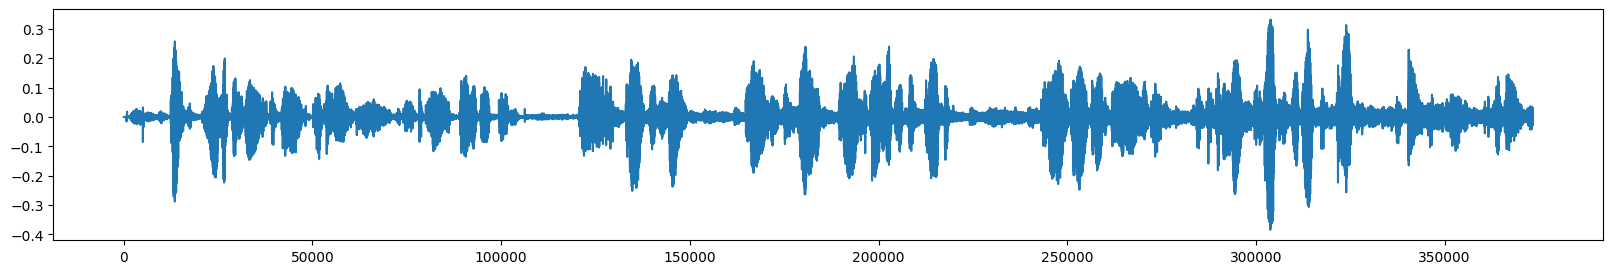

In [ ]:
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(arr)

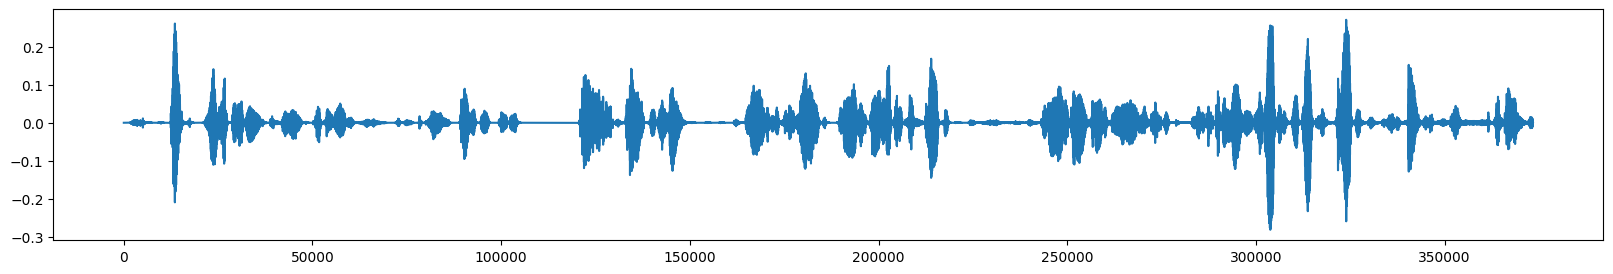

In [ ]:
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(reduced_noise)

In [ ]:
IPython.display.Audio(data="1.wav", rate=16000)

In [ ]:
IPython.display.Audio(data="1_reduced_noise.wav", rate=16000)

In [ ]:
audio = whisper_timestamped.load_audio("1_reduced_noise.wav")
result_reduced = whisper_timestamped.transcribe(model, audio, language="ru", detect_disfluencies=True, remove_punctuation_from_words=False)

100%|██████████| 2333/2333 [02:00<00:00, 19.43frames/s]


In [ ]:
result_reduced

## Pydub (deprecated)

In [ ]:
!pip install pydub

In [ ]:
from pydub import AudioSegment
from pydub.silence import detect_silence

In [ ]:
audio = AudioSegment.from_wav("long.wav")
dBFS = audio.dBFS

In [ ]:
dBFS

-22.0195597066083

In [ ]:
#audio = AudioSegment.from_file(audio, format="wav")

# Set the silence threshold (in dBFS)
silence_threshold = -40

# Detect silent chunks in the audio
silent_chunks = detect_silence(audio, min_silence_len=100, silence_thresh=dBFS-16)

# Print the start and end time of each silent chunk
for chunk in silent_chunks:
    print(f"Silent chunk: {chunk[0] / 1000} ms - {chunk[1] / 1000} ms")

Silent chunk: 0.0 ms - 0.503 ms
Silent chunk: 1.392 ms - 1.566 ms
Silent chunk: 2.213 ms - 2.358 ms
Silent chunk: 2.443 ms - 2.56 ms
Silent chunk: 2.584 ms - 2.694 ms
Silent chunk: 3.596 ms - 3.949 ms
Silent chunk: 4.108 ms - 4.251 ms
Silent chunk: 4.391 ms - 4.513 ms
Silent chunk: 4.992 ms - 5.681 ms
Silent chunk: 6.428 ms - 6.537 ms
Silent chunk: 6.68 ms - 6.785 ms
Silent chunk: 7.49 ms - 8.206 ms
Silent chunk: 8.436 ms - 8.551 ms
Silent chunk: 8.647 ms - 8.857 ms
Silent chunk: 9.358 ms - 9.52 ms
Silent chunk: 9.783 ms - 10.016 ms
Silent chunk: 10.218 ms - 10.334 ms
Silent chunk: 10.367 ms - 10.541 ms
Silent chunk: 10.624 ms - 10.74 ms
Silent chunk: 10.922 ms - 11.775 ms
Silent chunk: 12.78 ms - 12.969 ms
Silent chunk: 14.598 ms - 15.334 ms
Silent chunk: 15.803 ms - 16.019 ms
Silent chunk: 16.05 ms - 16.169 ms
Silent chunk: 16.319 ms - 16.543 ms
Silent chunk: 16.738 ms - 17.366 ms
Silent chunk: 17.617 ms - 17.79 ms
Silent chunk: 18.461 ms - 18.592 ms
Silent chunk: 18.854 ms - 19.052 